# Yellow Taxi Driver's Pay Analysis

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

We do the analysis for the month of January of 2019.

In [2]:
dfJ = pd.read_csv('yellow_tripdata_2019-01.csv')

In [3]:
dfJ.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1,2019-01-01 00:46:40,2019-01-01 00:53:20,1,1.5,1,N,151,239,1,7.0,0.5,0.5,1.65,0.0,0.3,9.95,NaN
1,1,2019-01-01 00:59:47,2019-01-01 01:18:59,1,2.6,1,N,239,246,1,14.0,0.5,0.5,1.00,0.0,0.3,16.30,NaN
2,2,2018-12-21 13:48:30,2018-12-21 13:52:40,3,0.0,1,N,236,236,1,4.5,0.5,0.5,0.00,0.0,0.3,5.80,NaN
3,2,2018-11-28 15:52:25,2018-11-28 15:55:45,5,0.0,1,N,193,193,2,3.5,0.5,0.5,0.00,0.0,0.3,7.55,NaN
4,2,2018-11-28 15:56:57,2018-11-28 15:58:33,5,0.0,2,N,193,193,2,52.0,0.0,0.5,0.00,0.0,0.3,55.55,NaN


In [4]:
dfJ.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7667792 entries, 0 to 7667791
Data columns (total 18 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   VendorID               int64  
 1   tpep_pickup_datetime   object 
 2   tpep_dropoff_datetime  object 
 3   passenger_count        int64  
 4   trip_distance          float64
 5   RatecodeID             int64  
 6   store_and_fwd_flag     object 
 7   PULocationID           int64  
 8   DOLocationID           int64  
 9   payment_type           int64  
 10  fare_amount            float64
 11  extra                  float64
 12  mta_tax                float64
 13  tip_amount             float64
 14  tolls_amount           float64
 15  improvement_surcharge  float64
 16  total_amount           float64
 17  congestion_surcharge   float64
dtypes: float64(9), int64(6), object(3)
memory usage: 1.0+ GB


Since there are less needed columns for this analysis we need to extract the needed columns. To calculate the **drivers_pay** we only considered **fare_amount** and the **tip_amount**.

In [5]:
dfJm=dfJ[['tpep_pickup_datetime','tpep_dropoff_datetime','trip_distance','fare_amount','tip_amount']]

In [6]:
dfJm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7667792 entries, 0 to 7667791
Data columns (total 5 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   tpep_pickup_datetime   object 
 1   tpep_dropoff_datetime  object 
 2   trip_distance          float64
 3   fare_amount            float64
 4   tip_amount             float64
dtypes: float64(3), object(2)
memory usage: 292.5+ MB


As the date and time columns are of type **object** we need to convert them to type **datetime**.

In [7]:
dfJm['tpep_pickup_datetime'] =  pd.to_datetime(dfJm['tpep_pickup_datetime'])

<ipython-input-7-7da115fd09e8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfJm['tpep_pickup_datetime'] =  pd.to_datetime(dfJm['tpep_pickup_datetime'])


In [8]:
dfJm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7667792 entries, 0 to 7667791
Data columns (total 5 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   tpep_pickup_datetime   datetime64[ns]
 1   tpep_dropoff_datetime  object        
 2   trip_distance          float64       
 3   fare_amount            float64       
 4   tip_amount             float64       
dtypes: datetime64[ns](1), float64(3), object(1)
memory usage: 292.5+ MB


In [9]:
dfJm.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,trip_distance,fare_amount,tip_amount
0,2019-01-01 00:46:40,2019-01-01 00:53:20,1.5,7.0,1.65
1,2019-01-01 00:59:47,2019-01-01 01:18:59,2.6,14.0,1.00
2,2018-12-21 13:48:30,2018-12-21 13:52:40,0.0,4.5,0.00
3,2018-11-28 15:52:25,2018-11-28 15:55:45,0.0,3.5,0.00
4,2018-11-28 15:56:57,2018-11-28 15:58:33,0.0,52.0,0.00


In [10]:
dfJm['tpep_dropoff_datetime'] =  pd.to_datetime(dfJm['tpep_dropoff_datetime'])

<ipython-input-10-166b5fbe118d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfJm['tpep_dropoff_datetime'] =  pd.to_datetime(dfJm['tpep_dropoff_datetime'])


In [11]:
dfJm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7667792 entries, 0 to 7667791
Data columns (total 5 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   tpep_pickup_datetime   datetime64[ns]
 1   tpep_dropoff_datetime  datetime64[ns]
 2   trip_distance          float64       
 3   fare_amount            float64       
 4   tip_amount             float64       
dtypes: datetime64[ns](2), float64(3)
memory usage: 292.5 MB


In [12]:
dfJm.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,trip_distance,fare_amount,tip_amount
0,2019-01-01 00:46:40,2019-01-01 00:53:20,1.5,7.0,1.65
1,2019-01-01 00:59:47,2019-01-01 01:18:59,2.6,14.0,1.00
2,2018-12-21 13:48:30,2018-12-21 13:52:40,0.0,4.5,0.00
3,2018-11-28 15:52:25,2018-11-28 15:55:45,0.0,3.5,0.00
4,2018-11-28 15:56:57,2018-11-28 15:58:33,0.0,52.0,0.00


First of all we look at the time it took for a each of the trips.

In [13]:
time_difference = dfJm['tpep_dropoff_datetime'] - dfJm['tpep_pickup_datetime']

In [14]:
time_difference.head()

0   00:06:40
1   00:19:12
2   00:04:10
3   00:03:20
4   00:01:36
dtype: timedelta64[ns]

We converted the **time_difference** to **seconds** so that we can normalize it for hourly par rate.

In [15]:
from datetime import datetime as dt

In [16]:
time_difference.dt.total_seconds()

0           400.0
1          1152.0
2           250.0
3           200.0
4            96.0
            ...  
7667787    1263.0
7667788      68.0
7667789       4.0
7667790      27.0
7667791      79.0
Length: 7667792, dtype: float64

In [17]:
dfJm['time_difference']=time_difference.dt.total_seconds()

<ipython-input-17-e496829bcf5d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfJm['time_difference']=time_difference.dt.total_seconds()


In [18]:
dfJm.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,trip_distance,fare_amount,tip_amount,time_difference
0,2019-01-01 00:46:40,2019-01-01 00:53:20,1.5,7.0,1.65,400.0
1,2019-01-01 00:59:47,2019-01-01 01:18:59,2.6,14.0,1.00,1152.0
2,2018-12-21 13:48:30,2018-12-21 13:52:40,0.0,4.5,0.00,250.0
3,2018-11-28 15:52:25,2018-11-28 15:55:45,0.0,3.5,0.00,200.0
4,2018-11-28 15:56:57,2018-11-28 15:58:33,0.0,52.0,0.00,96.0


In [19]:
dfJm['drivers_pay'] = dfJm['fare_amount'] + dfJm['tip_amount']

<ipython-input-19-1c8b2010d53b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfJm['drivers_pay'] = dfJm['fare_amount'] + dfJm['tip_amount']


In [20]:
dfJm.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,trip_distance,fare_amount,tip_amount,time_difference,drivers_pay
0,2019-01-01 00:46:40,2019-01-01 00:53:20,1.5,7.0,1.65,400.0,8.65
1,2019-01-01 00:59:47,2019-01-01 01:18:59,2.6,14.0,1.00,1152.0,15.00
2,2018-12-21 13:48:30,2018-12-21 13:52:40,0.0,4.5,0.00,250.0,4.50
3,2018-11-28 15:52:25,2018-11-28 15:55:45,0.0,3.5,0.00,200.0,3.50
4,2018-11-28 15:56:57,2018-11-28 15:58:33,0.0,52.0,0.00,96.0,52.00


**pay_rate** is the hourly rate of a driver and it is calculated as follows.

In [21]:
dfJm['pay_rate'] = (dfJm['drivers_pay']/dfJm['time_difference'])*3600

<ipython-input-21-e36952402982>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfJm['pay_rate'] = (dfJm['drivers_pay']/dfJm['time_difference'])*3600


In [22]:
dfJm.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,trip_distance,fare_amount,tip_amount,time_difference,drivers_pay,pay_rate
0,2019-01-01 00:46:40,2019-01-01 00:53:20,1.5,7.0,1.65,400.0,8.65,77.850
1,2019-01-01 00:59:47,2019-01-01 01:18:59,2.6,14.0,1.00,1152.0,15.00,46.875
2,2018-12-21 13:48:30,2018-12-21 13:52:40,0.0,4.5,0.00,250.0,4.50,64.800
3,2018-11-28 15:52:25,2018-11-28 15:55:45,0.0,3.5,0.00,200.0,3.50,63.000
4,2018-11-28 15:56:57,2018-11-28 15:58:33,0.0,52.0,0.00,96.0,52.00,1950.000


In order to find the relation between the **pay_rate** and the time of the day we need to convert the **datetime** to **PU_hour** which is the pick up hour of the day.

In [23]:
dfJm['PU_hour'] = dfJm['tpep_pickup_datetime'].dt.hour

<ipython-input-23-ec56bdd631e0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfJm['PU_hour'] = dfJm['tpep_pickup_datetime'].dt.hour


In [24]:
dfJm.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,trip_distance,fare_amount,tip_amount,time_difference,drivers_pay,pay_rate,PU_hour
0,2019-01-01 00:46:40,2019-01-01 00:53:20,1.5,7.0,1.65,400.0,8.65,77.850,0
1,2019-01-01 00:59:47,2019-01-01 01:18:59,2.6,14.0,1.00,1152.0,15.00,46.875,0
2,2018-12-21 13:48:30,2018-12-21 13:52:40,0.0,4.5,0.00,250.0,4.50,64.800,13
3,2018-11-28 15:52:25,2018-11-28 15:55:45,0.0,3.5,0.00,200.0,3.50,63.000,15
4,2018-11-28 15:56:57,2018-11-28 15:58:33,0.0,52.0,0.00,96.0,52.00,1950.000,15


When we find the mean of the **pay_rate** against the **PU_hour** we find the data is not clean.

In [25]:
dfJm.groupby(['PU_hour'])['pay_rate'].mean()

PU_hour
0     inf
1     inf
2     inf
3     inf
4     inf
5     inf
6     inf
7     NaN
8     inf
9     NaN
10    inf
11    NaN
12    inf
13    inf
14    NaN
15    NaN
16    inf
17    inf
18    inf
19    inf
20    inf
21    inf
22    inf
23    inf
Name: pay_rate, dtype: float64

In [26]:
dfJm[dfJm['PU_hour'] == 0]['pay_rate'].describe()

count    2.076260e+05
mean              inf
std               NaN
min     -3.744000e+04
25%      6.052500e+01
50%      7.114625e+01
75%      8.698225e+01
max               inf
Name: pay_rate, dtype: float64

In [27]:
dfJm.time_difference.describe()

count    7.667792e+06
mean     9.888731e+02
std      4.908903e+03
min     -5.056830e+06
25%      3.660000e+02
50%      6.090000e+02
75%      9.940000e+02
max      2.618881e+06
Name: time_difference, dtype: float64

We need to get those times where the **time_difference** is greater than 0.

In [28]:
dfJm2 = dfJm[dfJm.time_difference > 0]

In [29]:
dfJm2.time_difference.describe()

count    7.661498e+06
mean     9.905856e+02
std      4.517685e+03
min      1.000000e+00
25%      3.660000e+02
50%      6.100000e+02
75%      9.940000e+02
max      2.618881e+06
Name: time_difference, dtype: float64

In [30]:
dfJm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7667792 entries, 0 to 7667791
Data columns (total 9 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   tpep_pickup_datetime   datetime64[ns]
 1   tpep_dropoff_datetime  datetime64[ns]
 2   trip_distance          float64       
 3   fare_amount            float64       
 4   tip_amount             float64       
 5   time_difference        float64       
 6   drivers_pay            float64       
 7   pay_rate               float64       
 8   PU_hour                int64         
dtypes: datetime64[ns](2), float64(6), int64(1)
memory usage: 526.5 MB


In [31]:
dfJm2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7661498 entries, 0 to 7667791
Data columns (total 9 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   tpep_pickup_datetime   datetime64[ns]
 1   tpep_dropoff_datetime  datetime64[ns]
 2   trip_distance          float64       
 3   fare_amount            float64       
 4   tip_amount             float64       
 5   time_difference        float64       
 6   drivers_pay            float64       
 7   pay_rate               float64       
 8   PU_hour                int64         
dtypes: datetime64[ns](2), float64(6), int64(1)
memory usage: 584.5 MB


A bar graph is produced to show the change of hourly pay rate with the customer pick up hour

In [32]:
hourly_pay = dfJm2.groupby(['PU_hour'])['pay_rate'].mean()

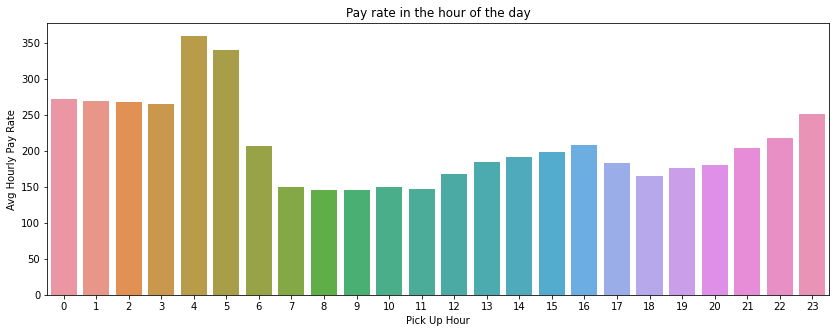

In [33]:
fig, ax = plt.subplots(1, 1, figsize=(14,5))
_ = sns.barplot(hourly_pay.index, hourly_pay, ax = ax)
ax.set_xlabel('Pick Up Hour')
ax.set_ylabel('Avg Hourly Pay Rate')
_ = ax.set_title('Pay rate in the hour of the day')

In [34]:
hourly_trip_distance = dfJm2.groupby(['PU_hour'])['trip_distance'].mean()

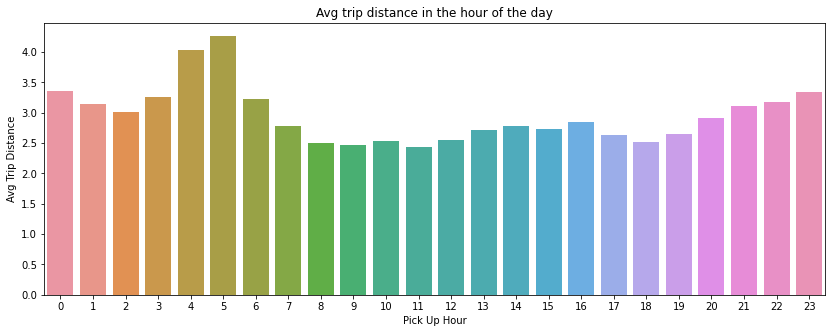

In [35]:
fig, ax = plt.subplots(1, 1, figsize=(14,5))
_ = sns.barplot(hourly_trip_distance.index, hourly_trip_distance, ax = ax)
ax.set_xlabel('Pick Up Hour')
ax.set_ylabel('Avg Trip Distance')
_ = ax.set_title('Avg trip distance in the hour of the day')

When the hourly pay rates are compared to the distances of trips a correlation can be seen in the bar graphs. **The higher pay rates may be due to that the customers may have a higher demand during corresponding hours**.

### Pay per unit distance traveled

Now we look at the hourly behaviour of the pay per unit distance traveled.

In [36]:
dfJm3 = dfJm2[dfJm2.trip_distance > 0]

In [37]:
dfJm3.trip_distance.describe()

count    7.612697e+06
mean     2.821187e+00
std      3.743168e+00
min      1.000000e-02
25%      9.200000e-01
50%      1.540000e+00
75%      2.820000e+00
max      8.318000e+02
Name: trip_distance, dtype: float64

In [38]:
dfJm3.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,trip_distance,fare_amount,tip_amount,time_difference,drivers_pay,pay_rate,PU_hour
0,2019-01-01 00:46:40,2019-01-01 00:53:20,1.5,7.0,1.65,400.0,8.65,77.850000,0
1,2019-01-01 00:59:47,2019-01-01 01:18:59,2.6,14.0,1.00,1152.0,15.00,46.875000,0
7,2019-01-01 00:21:28,2019-01-01 00:28:37,1.3,6.5,1.25,429.0,7.75,65.034965,0
8,2019-01-01 00:32:01,2019-01-01 00:45:39,3.7,13.5,3.70,818.0,17.20,75.696822,0
9,2019-01-01 00:57:32,2019-01-01 01:09:32,2.1,10.0,1.70,720.0,11.70,58.500000,0


In [39]:
dfJm3.pay_rate.describe()

count    7.612697e+06
mean     9.834578e+01
std      1.749014e+03
min     -9.600000e+04
25%      5.397653e+01
50%      6.391189e+01
75%      7.820690e+01
max      1.879175e+06
Name: pay_rate, dtype: float64

In [40]:
dfJm4 = dfJm3[dfJm3.pay_rate > 0]

In [41]:
dfJm4.pay_rate.describe()

count    7.606168e+06
mean     9.906520e+01
std      1.744670e+03
min      2.816681e-03
25%      5.400000e+01
50%      6.393443e+01
75%      7.823322e+01
max      1.879175e+06
Name: pay_rate, dtype: float64

In [42]:
dfJm4['pay_per_unit_dist'] = dfJm4.pay_rate/dfJm4.trip_distance

<ipython-input-42-ad85ec106165>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfJm4['pay_per_unit_dist'] = dfJm4.pay_rate/dfJm4.trip_distance


In [43]:
dfJm4.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,trip_distance,fare_amount,tip_amount,time_difference,drivers_pay,pay_rate,PU_hour,pay_per_unit_dist
0,2019-01-01 00:46:40,2019-01-01 00:53:20,1.5,7.0,1.65,400.0,8.65,77.850000,0,51.900000
1,2019-01-01 00:59:47,2019-01-01 01:18:59,2.6,14.0,1.00,1152.0,15.00,46.875000,0,18.028846
7,2019-01-01 00:21:28,2019-01-01 00:28:37,1.3,6.5,1.25,429.0,7.75,65.034965,0,50.026896
8,2019-01-01 00:32:01,2019-01-01 00:45:39,3.7,13.5,3.70,818.0,17.20,75.696822,0,20.458600
9,2019-01-01 00:57:32,2019-01-01 01:09:32,2.1,10.0,1.70,720.0,11.70,58.500000,0,27.857143


We can see that the **Average Pay per Unit Distance is** exceptionally higher during the **5th hour** of the day.

In [44]:
pay_per_dist = dfJm4.groupby(['PU_hour'])['pay_per_unit_dist'].mean()

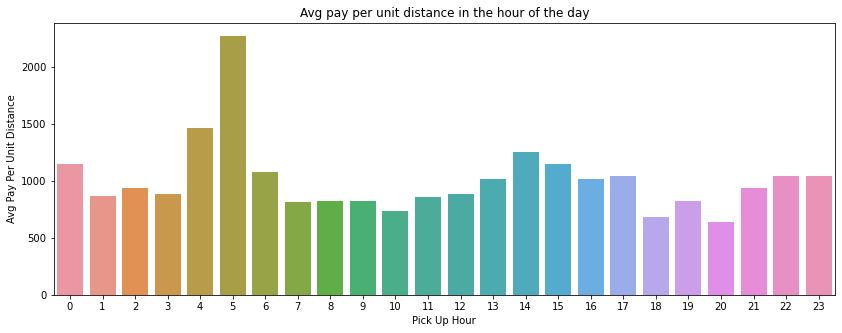

In [45]:
fig, ax = plt.subplots(1, 1, figsize=(14,5))
_ = sns.barplot(pay_per_dist.index, pay_per_dist, ax = ax)
ax.set_xlabel('Pick Up Hour')
ax.set_ylabel('Avg Pay Per Unit Distance')
_ = ax.set_title('Avg pay per unit distance in the hour of the day')

As one final analysis we draw a scatter plot to find out whether there is a connection between **tip_amount** and the **trip_distance**. 

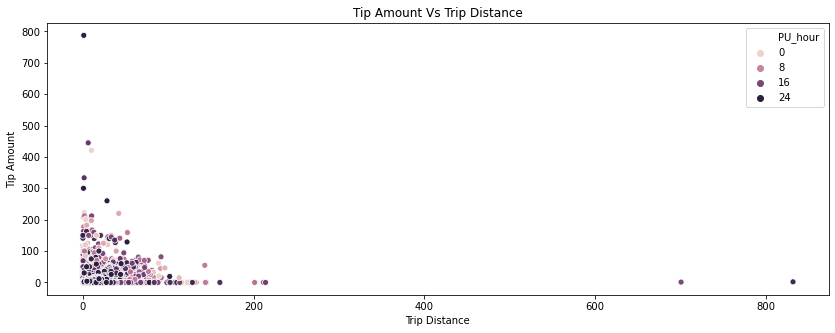

In [47]:
fig, ax = plt.subplots(1, 1, figsize=(14,5))
_ = sns.scatterplot(x = 'trip_distance', y = 'tip_amount', hue = 'PU_hour', data = dfJm4, ax = ax)
ax.set_xlabel('Trip Distance')
ax.set_ylabel('Tip Amount')
_ = ax.set_title('Tip Amount Vs Trip Distance')

## Predicting the Yellow Cab Drivers Pay
**We fit a LinearRegression model to predict the yellow cab drivers pay.**

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor

In [49]:
df = pd.read_csv('cleaned_taxi_data.csv')

In [50]:
df.head()

,Unnamed: 0,trip_distance,time_difference,drivers_pay,PU_hour
0,0,1.5,400.0,8.65,0
1,1,2.6,1152.0,15.00,0
2,7,1.3,429.0,7.75,0
3,8,3.7,818.0,17.20,0
4,9,2.1,720.0,11.70,0


In [51]:
X0 = df[['trip_distance','time_difference','drivers_pay','PU_hour']]

In [52]:
X0.head()

,trip_distance,time_difference,drivers_pay,PU_hour
0,1.5,400.0,8.65,0
1,2.6,1152.0,15.00,0
2,1.3,429.0,7.75,0
3,3.7,818.0,17.20,0
4,2.1,720.0,11.70,0


In [53]:
X0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7606168 entries, 0 to 7606167
Data columns (total 4 columns):
 #   Column           Dtype  
---  ------           -----  
 0   trip_distance    float64
 1   time_difference  float64
 2   drivers_pay      float64
 3   PU_hour          int64  
dtypes: float64(3), int64(1)
memory usage: 232.1 MB


In [54]:
X = X0[['trip_distance','time_difference']]
Y = X0[['drivers_pay']]

In [55]:
X.head()

,trip_distance,time_difference
0,1.5,400.0
1,2.6,1152.0
2,1.3,429.0
3,3.7,818.0
4,2.1,720.0


In [56]:
Y.head()

,drivers_pay
0,8.65
1,15.00
2,7.75
3,17.20
4,11.70


In [57]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.3, random_state = 1)

In [58]:
regr = LinearRegression()

In [59]:
regr.fit(X_train,Y_train)

LinearRegression()

In [60]:
Y_hat = regr.predict(X_test)

In [61]:
print('Coefficients: \n', regr.coef_)
print('Mean squared error: %.2f'
      % mean_squared_error(Y_test, Y_hat))
print('Coefficient of determination: %.2f'
      % r2_score(Y_test, Y_hat))

Coefficients: 
 [[3.05565197e+00 4.14695269e-05]]
Mean squared error: 170273.82
Coefficient of determination: 0.00


It is noticed that the Mean Squared Error is very high and the Coefficient of Determination is 0. Which indicates that the drivers_pay is not predictable by the used predictors in general.

Therefore we take a different approach. We try to check whether there is a correlation when the data is considered hour by hour. The analysis is as follows.

In [62]:
def hourly_correlation(X_hour):
    X = X_hour[['trip_distance','time_difference']]
    Y = X_hour[['drivers_pay']]
    
    X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.3, random_state = 1)
    
    regr = LinearRegression()
    regr.fit(X_train,Y_train)
    
    Y_hat = regr.predict(X_test)
    
    return mean_squared_error(Y_test, Y_hat),r2_score(Y_test, Y_hat)

In [63]:
X1 = df[df.PU_hour == 0]
mse,r2 = hourly_correlation(X1)
print('Mean squared error: %.2f'
      % mse)
print('Coefficient of determination: %.2f'
      % r2)

Mean squared error: 24.37
Coefficient of determination: 0.86


In [64]:
mse_list = []
r2_list = []
hour = []

for i in range(24):
    X_hour = df[df.PU_hour == i]
    mse,r2 = hourly_correlation(X_hour)
    
    mse_list.append(mse)
    r2_list.append(r2)
    hour.append(i)

In [65]:
print(hour)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]


## Analysis of the hourly Mean Squared Error

From the bar plot we can observe that the variance (MSE) of the **drivers pay** is exceptionally high during the 13th hour of the day. This may be due to the fact that people going out for lunch during this hour. This leads to increased demand which can be levered to ask for higher rates.

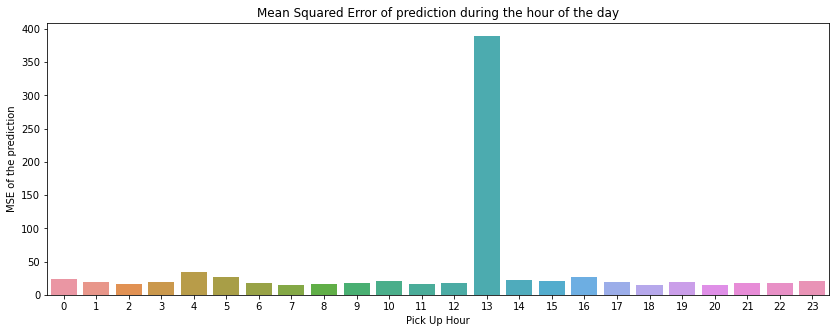

In [66]:
fig, ax = plt.subplots(1, 1, figsize=(14,5))
_ = sns.barplot(hour , mse_list, ax = ax)
ax.set_xlabel('Pick Up Hour')
ax.set_ylabel('MSE of the prediction')
_ = ax.set_title('Mean Squared Error of prediction during the hour of the day')

### Analysis of the hourly Coffecient of Determination

Similar to the analysis of MSE we can see the same outlying behavior during *13th* hour in *r2_score* as well. During the all the other hours *r2_score* is high as well as uniformly distributed. We can fairly conclude that with the exception of the *13th* hour the pay rate can be predicted based on the *trip_distance* and the *trip_time* with a high accuracy.

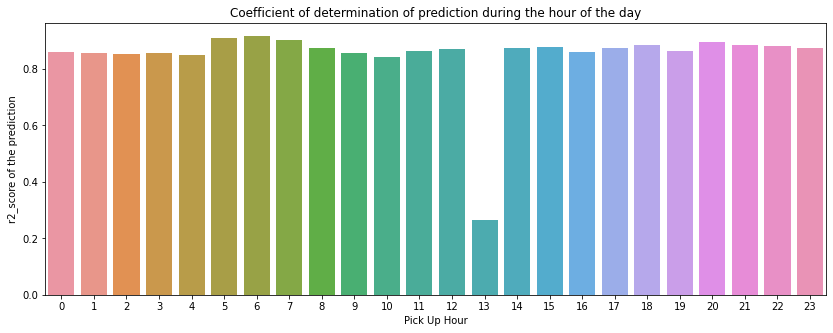

In [67]:
fig, ax = plt.subplots(1, 1, figsize=(14,5))
_ = sns.barplot(hour , r2_list, ax = ax)
ax.set_xlabel('Pick Up Hour')
ax.set_ylabel('r2_score of the prediction')
_ = ax.set_title('Coefficient of determination of prediction during the hour of the day')